In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('left03.jpg', cv.IMREAD_GRAYSCALE)

camera = np.load('camera.npz')

mtx = camera['mtx']
dist = camera['dist']

ret, corners = cv.findChessboardCorners(img, (7,6), None)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
corners = cv.cornerSubPix(img, corners, (11,11), (-1,-1), criteria)

chess_points = np.zeros((6*7,3), np.float32)
chess_points[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

ret, rvecs, tvecs = cv.solvePnP(chess_points, corners, mtx, dist)

(([], []), ([], []))

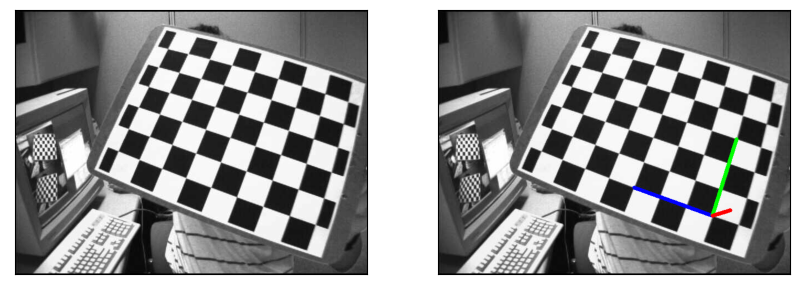

In [2]:
axis_points = np.float32([[0,0,0], [3,0,0], [0,3,0], [0,0,-3]])

imgpoints, _ = cv.projectPoints(axis_points, rvecs, tvecs, mtx, dist)

imgpoints = np.int32(imgpoints).reshape(-1,2)

res = img.copy()
res = cv.cvtColor(res, cv.COLOR_GRAY2BGR)
res = cv.line(res, imgpoints[0], imgpoints[1], (255,0,0), 5)
res = cv.line(res, imgpoints[0], imgpoints[2], (0,255,0), 5)
res = cv.line(res, imgpoints[0], imgpoints[3], (0,0,255), 5)

plt.figure(figsize=(10,10))

plt.subplot(1,2,1), plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2), plt.imshow(res[:,:,::-1], cmap='gray')
plt.xticks([]), plt.yticks([])